In [1]:
from sympy import *
import random
import matplotlib.pyplot as plt

def plot_intervals(intervals):
    _, ax = plt.subplots(figsize=(6,2))
    y, ymax = 0, 0  # Initial y position
    plotted_intervals = []  # Keep track of plotted intervals to handle overlaps
    
    ax.set_xticks([])
    ax.set_yticks([])

    for interval in intervals:
        # Check for overlap and adjust y if necessary
        overlap = True
        while overlap:
            overlap = False
            for pi in plotted_intervals:
                if not (interval[1] <= pi[0] or interval[0] >= pi[1]) and pi[2] == y:
                    y += 0.25  # Move up if there's an overlap
                    ymax = max(y, ymax)
                    overlap = True
                    break
        
        # Plot the interval
        ax.plot(interval, [y, y], marker='|', markersize=15)
        plotted_intervals.append((interval[0], interval[1], y))
        
        # Reset y if it was adjusted, for the next interval
        if y != 0:
            y = 0
    
    # Set limits and labels
    ax.set_ylim(-0.25, ymax + 0.25)  # Adjust y limits to fit all intervals
    plt.show()

def generate_intervals(n):
    def generate_helper(numbers):
        if not numbers:
            return [[]]
        intervals = []
        # We skip the first number for the end point because an interval
        # cannot have the same start and end point.
        for i in range(1, len(numbers)):
            # Choose the current number as the start point and numbers[i] as the end point
            start, end = numbers[0], numbers[i]
            # Generate all combinations for the remaining numbers
            for rest in generate_helper(numbers[1:i] + numbers[i+1:]):
                intervals.append([(start, end)] + rest)
        return intervals

    # Start with a list of numbers from 1 to 2n
    numbers = list(range(1, 2 * n + 1))
    n = 0
    for intervals in generate_helper(numbers):
        n += 1
        plot_intervals(intervals)
    print(f'{n} configurations generated.')

# ---------- GPT 生成的代码结束 ----------

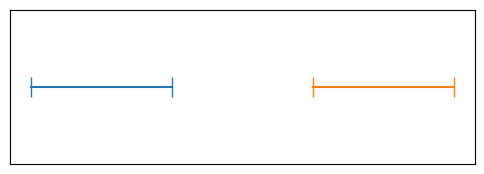

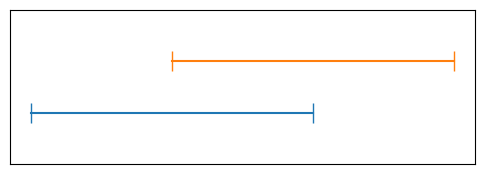

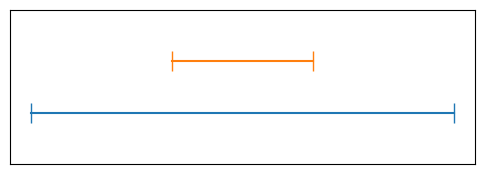

3 configurations generated.


In [2]:
generate_intervals(2)

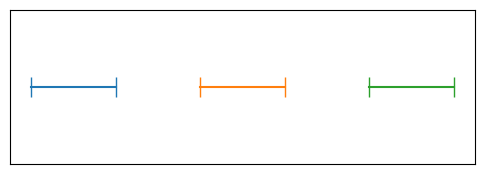

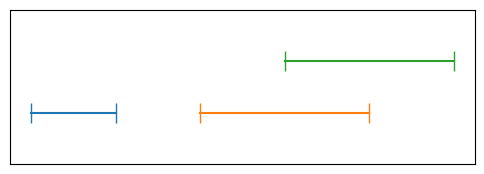

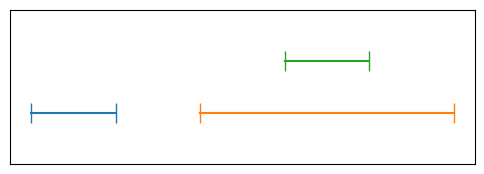

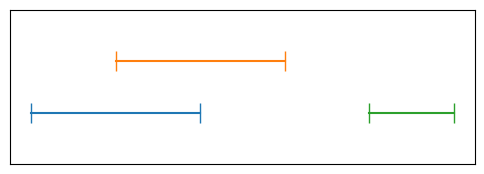

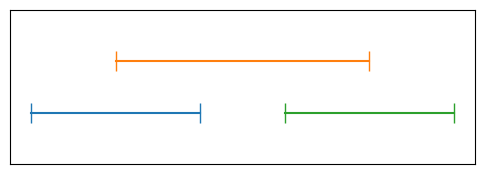

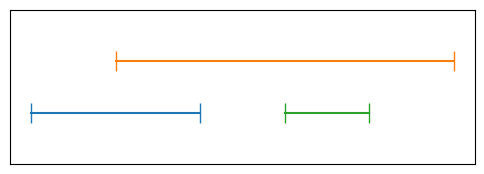

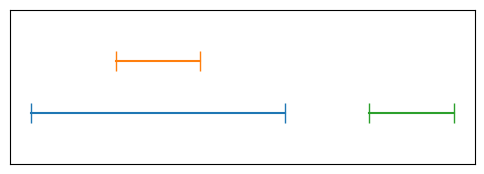

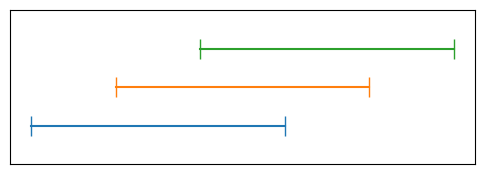

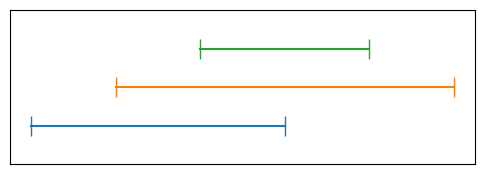

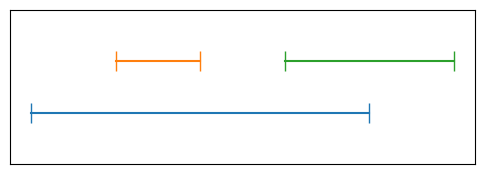

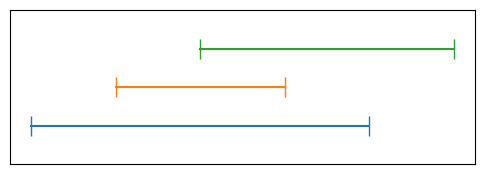

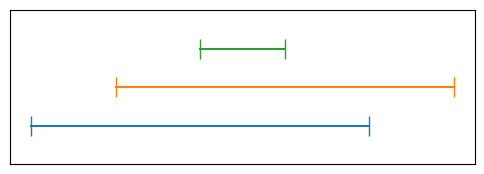

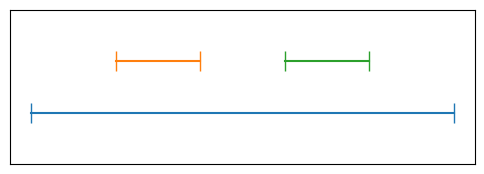

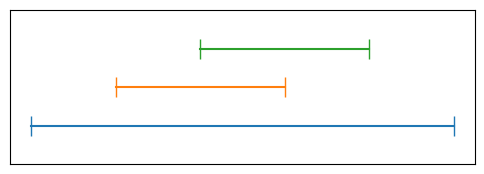

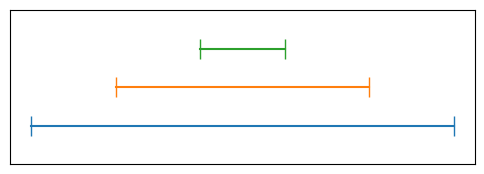

15 configurations generated.


In [3]:
generate_intervals(3)